This notebook does final formatting and renaming to make the tensors dissemination worthy.

In [1]:
# Imports
import cv2
from matplotlib import pyplot as plt
from scipy import ndimage
import numpy as np
from PIL import Image
from tqdm import tqdm_notebook
import operator
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/gdrive')
import os
project_dir=('/gdrive/My Drive/Colab Notebooks/Kannada_MNIST')
os.chdir(project_dir)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


Load the MNIST dataset first, that will serve as the target template

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
print(x_train.min(),x_test.min(),x_train.max(),x_test.max())
x_train.dtype,x_test.dtype,x_train.dtype,x_test.dtype

Using TensorFlow backend.


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
0 0 255 255


(dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'))

In [0]:
def print_stats(x_train,y_train,x_test,y_test):
  print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
  print(x_train.min(),x_test.min(),x_train.max(),x_test.max())
  print(y_train.min(),y_test.min(),y_train.max(),y_test.max())
  return 

Load the tensors created thus far and visualize them to perform the sanity checks

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)
0.0 0.0 255.0 255.0
0.0 0.0 9.0 9.0
(10240, 28, 28, 1) (10240,)
0.0 255.0 0.0 9.0


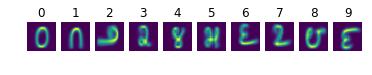

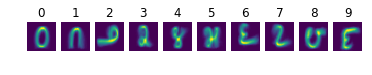

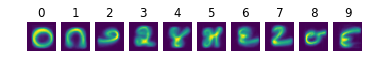

In [4]:
X_KaMnist_test=np.load('./data/output_tensors/X_test_KaMNIST_wc.npy')
y_KaMnist_test=np.load('./data/output_tensors/y_test_KaMNIST_wc.npy')

X_KaMnist_train=np.load('./data/output_tensors/X_train_KaMNIST_wc.npy')
y_KaMnist_train=np.load('./data/output_tensors/y_train_KaMNIST_wc.npy')

print_stats(X_KaMnist_train,y_KaMnist_train,X_KaMnist_test,y_KaMnist_test)
  
X_KaMnist_10k=np.load('./data/output_tensors/X_Kannada_mnist_10k_RWC.npy')
y_KaMnist_10k=np.load('./data/output_tensors/y_Kannada_mnist_10k_RWC.npy')

print(X_KaMnist_10k.shape,y_KaMnist_10k.shape)
print(X_KaMnist_10k.min(),X_KaMnist_10k.max(),y_KaMnist_10k.min(),y_KaMnist_10k.max())


for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(np.mean(X_KaMnist_train[y_KaMnist_train==i,:,:,0], axis=0))
    plt.axis('off')
    plt.title(i)
    
plt.figure()    
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(np.mean(X_KaMnist_test[y_KaMnist_test==i,:,:,0], axis=0))
    plt.axis('off')
    plt.title(i)
    
plt.figure()    
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(np.mean(X_KaMnist_10k[y_KaMnist_10k==i,:,:,0], axis=0))
    plt.axis('off')
    plt.title(i)

OK. So, we need to do two things:

1.   Squeeze the tensors
2.   Convert dtype to uint8


In [5]:
################################

X_KaMnist_train=np.squeeze(X_KaMnist_train).astype(np.uint8)
X_KaMnist_test=np.squeeze(X_KaMnist_test).astype(np.uint8)

################################

y_KaMnist_train=np.squeeze(y_KaMnist_train).astype(np.uint8)
y_KaMnist_test=np.squeeze(y_KaMnist_test).astype(np.uint8)

################################

X_KaMnist_10k=np.squeeze(X_KaMnist_10k).astype(np.uint8)
y_KaMnist_10k=np.squeeze(y_KaMnist_10k).astype(np.uint8)

################################
print_stats(X_KaMnist_train,y_KaMnist_train,X_KaMnist_test,y_KaMnist_test)


print(X_KaMnist_10k.shape,y_KaMnist_10k.shape)
print(X_KaMnist_10k.min(),X_KaMnist_10k.max(),y_KaMnist_10k.min(),y_KaMnist_10k.max())

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
0 0 255 255
0 0 9 9
(10240, 28, 28) (10240,)
0 255 0 9


Bincount check:

In [6]:
np.bincount(y_KaMnist_train),np.bincount(y_KaMnist_test),np.bincount(y_KaMnist_10k)

(array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]),
 array([1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024]))

Random image-eye-balling check

(60000, 28, 28) (60000,) 0 255
(10000, 28, 28) (10000,) 0 255
(10240, 28, 28) (10240,) 0 255


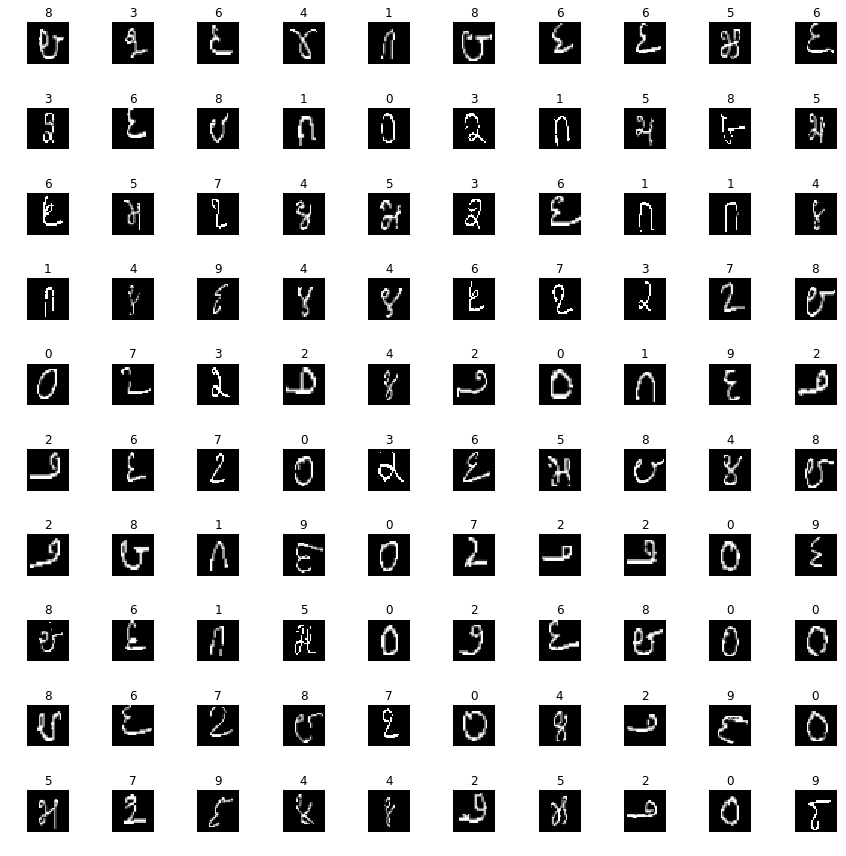

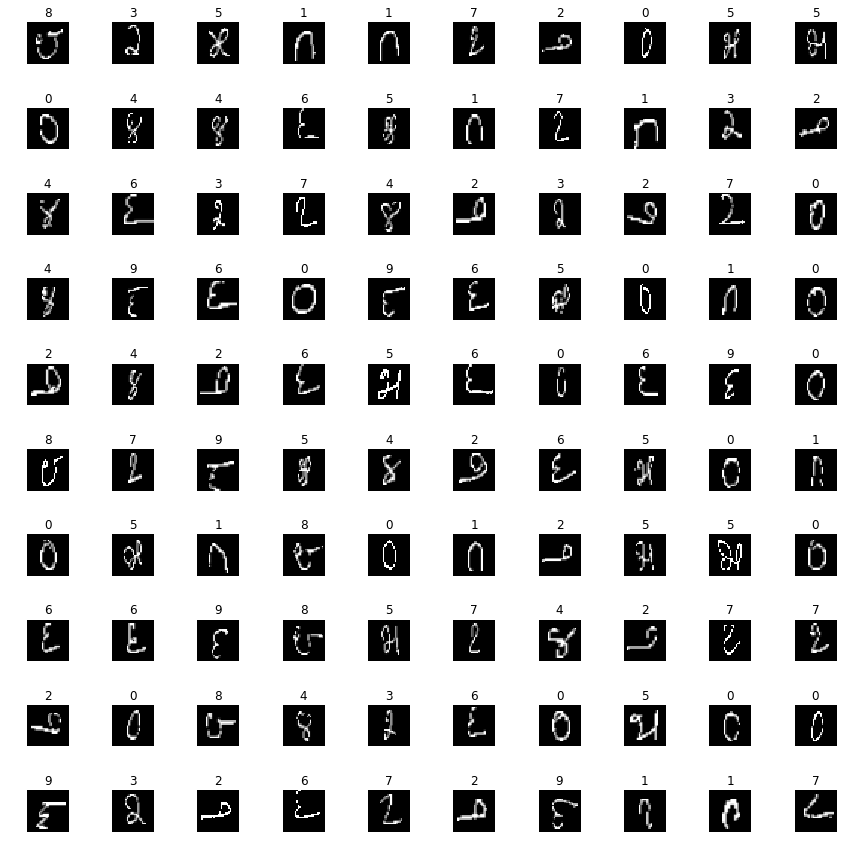

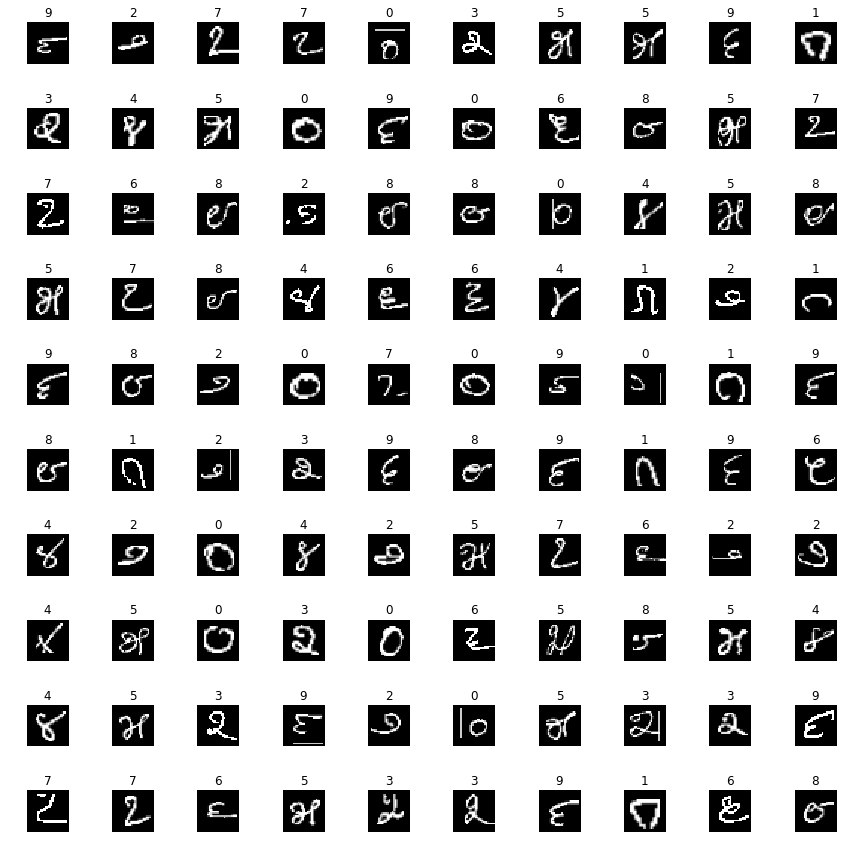

In [7]:
%matplotlib inline
import random

def rand_viz_check(X,y):
  print(X.shape,y.shape,X.min(),X.max())

  plt.figure(figsize=(12,12))
  for i,j in enumerate(random.sample(range(int(X.shape[0])),100)):
      plt.subplot(10,10,i+1)
      plt.imshow(X[j,:,:],cmap='gray')
      plt.title(int(y[j]))
      plt.axis('Off')
  plt.tight_layout()
rand_viz_check(X_KaMnist_train,y_KaMnist_train)
rand_viz_check(X_KaMnist_test,y_KaMnist_test)
rand_viz_check(X_KaMnist_10k,y_KaMnist_10k)

In [8]:
X_KaMnist_10k.dtype

dtype('uint8')

In [10]:
os.chdir('./Morpho-MNIST')
print(os.listdir())
from morphomnist.io import save_idx
# Source: https://github.com/dccastro/Morpho-MNIST/blob/bb01283636a79b8b4752ea241c2d263f45c84409/experiments/diversity/dist_plots.py
out_dir=('../data/output_tensors/MNIST_format/')

save_idx(X_KaMnist_10k, out_dir+"X_dig_MNIST-idx3-ubyte.gz")
save_idx(y_KaMnist_10k, out_dir+"y_dig_MNIST-idx1-ubyte.gz")

save_idx(X_KaMnist_train, out_dir+"X_kannada_MNIST_train-idx3-ubyte.gz")
save_idx(y_KaMnist_train, out_dir+"y_kannada_MNIST_train-idx1-ubyte.gz")

save_idx(X_KaMnist_test, out_dir+"X_kannada_MNIST_test-idx3-ubyte.gz")
save_idx(y_KaMnist_test, out_dir+"y_kannada_MNIST_test-idx1-ubyte.gz")



['.git', '.gitignore', 'README.md', 'analysis', 'experiments', 'fig1.png', 'models', 'morphomnist', 'scripts']


Testing if the 'ubyte.gz'ing works:

(10240, 28, 28)


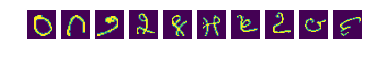

In [11]:
!pip install idx2numpy
!pip install sh
import idx2numpy
from sh import gunzip
gunzip(out_dir+"X_dig_MNIST-idx3-ubyte.gz")
arr = idx2numpy.convert_from_file(out_dir+'X_dig_MNIST-idx3-ubyte')
print(arr.shape)
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(arr[i])
  plt.axis('Off')

In [0]:
np.save(out_dir+"X_dig_MNIST.npy",X_KaMnist_10k)
np.save(out_dir+"y_dig_MNIST.npy",y_KaMnist_10k)

np.save(out_dir+"X_kannada_MNIST_train.npy",X_KaMnist_train)
np.save(out_dir+"y_kannada_MNIST_train.npy",y_KaMnist_train)

np.save(out_dir+"X_kannada_MNIST_test.npy",X_KaMnist_test)
np.save(out_dir+"y_kannada_MNIST_test.npy",y_KaMnist_test)

In [0]:
np.savez(out_dir+"X_dig_MNIST.npz",X_KaMnist_10k)
np.savez(out_dir+"y_dig_MNIST.npz",y_KaMnist_10k)

np.savez(out_dir+"X_kannada_MNIST_train.npz",X_KaMnist_train)
np.savez(out_dir+"y_kannada_MNIST_train.npz",y_KaMnist_train)

np.savez(out_dir+"X_kannada_MNIST_test.npz",X_KaMnist_test)
np.savez(out_dir+"y_kannada_MNIST_test.npz",y_KaMnist_test)

In [0]:
save_idx(X_KaMnist_10k, out_dir+"X_dig_MNIST-idx3-ubyte.gz")

Neat! Seems like this works. Now, to archive these onto some online repositories then.